In [529]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [530]:
sns.set()
np.set_printoptions(suppress=True)

In [531]:
# load data
tax = pandas.read_csv("incomeTaxData.csv")
tax

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order
0,2011,Hamilton,"500,000 and over",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,13
1,2003,Dutchess,"100,000 - 199,999",NaN,12738.0,1668991.0,261775.0,16628.0,1390589.0,91652.0,87689.0,19,10
2,2001,Ontario,Total,NaN,44898.0,1829734.0,449962.0,25393.0,1354378.0,77454.0,72764.0,38,12
3,2012,New York City - Richmond,"30,000 - 39,999",NaN,16086.0,559918.0,192402.0,10519.0,356997.0,17286.0,12238.0,5,5
4,2007,Clinton,"50,000 - 59,999",NaN,2197.0,120482.0,29429.0,1649.0,89404.0,4738.0,4220.0,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,2013,Residence Unknown ++,"100,000 - 199,999",NaN,527.0,74543.0,10177.0,282.0,64083.0,4095.0,3720.0,66,10
12585,2013,Residence Unknown ++,"200,000 - 249,999",NaN,127.0,28013.0,3219.0,93.0,24702.0,1643.0,1469.0,66,11
12586,2013,Residence Unknown ++,"250,000 - 499,999",NaN,223.0,79218.0,5876.0,174.0,73168.0,4972.0,4492.0,66,12
12587,2013,Residence Unknown ++,"500,000 and over",NaN,326.0,872846.0,14092.0,290.0,858465.0,71780.0,63360.0,66,13


You can see just from the first line of the dataset that the there are some rows with no returns associated with it. Let's delete those from the dataset.

Also note that all of the data is in thousands of dollars.

In [532]:
# clean data
tax = tax.dropna(subset=['ReturnCount'])
tax = tax.sort_values(by=['Year'])
tax['County'] = tax['County'].str.strip()

# create new columns
tax['avg_tax'] = tax['TotalTaxLiability']/tax['ReturnCount']

In [533]:
tax.County.unique()

array(['New York City - Richmond', 'Putnam', 'Warren', 'Lewis',
       'Allegany', 'Wayne', 'Wyoming', 'Nassau', 'Rensselaer', 'Franklin',
       'Monroe', 'Residence Unknown ++', 'Chenango', 'Cayuga', 'Genesee',
       'Erie', 'Montgomery', 'NYS Unclassified +', 'Fulton', 'Chemung',
       'Oneida', 'Saratoga', 'Broome', 'Rockland', 'Madison',
       'New York City - Queens', 'Tompkins', 'Suffolk', 'Delaware',
       'Orange', 'Hamilton', 'Sullivan', 'Tioga', 'Greene', 'Onondaga',
       'Cortland', 'Columbia', 'Schenectady', 'St. Lawrence',
       'New York City - Kings', 'Essex', 'Oswego',
       'New York City - Manhattan', 'Albany', 'Ontario',
       'Grand Total, Full-Year Resident', 'Seneca', 'Yates',
       'Westchester', 'Orleans', 'Schoharie', 'Dutchess', 'Herkimer',
       'Steuben', 'Clinton', 'Otsego', 'Schuyler', 'Livingston',
       'Jefferson', 'New York City - Bronx', 'Niagara', 'Ulster',
       'Washington', 'Cattaraugus', 'Chautauqua'], dtype=object)

## a)


Plot the number of returns in Tompkins County from each income class bracket over time on a single graph.（Ignore the rows with the class of 'Total'. Should span 1999-2013. Some of the county names may have leading/trailing whitespaces.）

<AxesSubplot: xlabel='Year', ylabel='ReturnCount'>

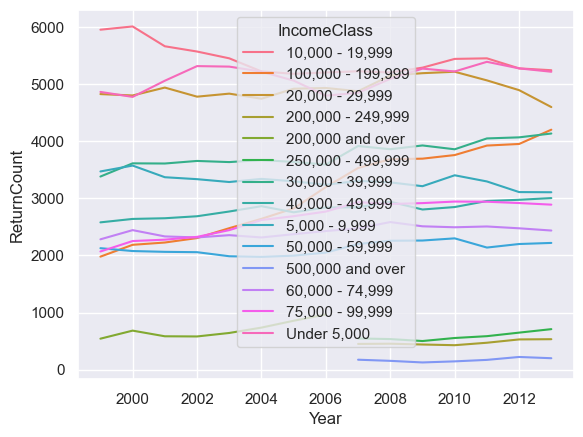

In [534]:
tax_a1 = tax[tax['IncomeClass'] != "Total"]
tax_a1 = tax_a1[tax_a1['County'] == "Tompkins"]
tax_a1 = tax_a1.groupby(["IncomeClass", "Year"]).sum()
sns.lineplot(x = "Year", y = "ReturnCount", hue = "IncomeClass", data=tax_a1)

Plot the average income tax per return in Tompkins County (disregarding income tax).（You could add up the all income classes (except 'Total') to calculate the weighted average tax OR just plot the rows of 'Total'. The sum might differ from the number in 'total'; either answer is ok. Messy data!)

<AxesSubplot: xlabel='Year', ylabel='avg_tax'>

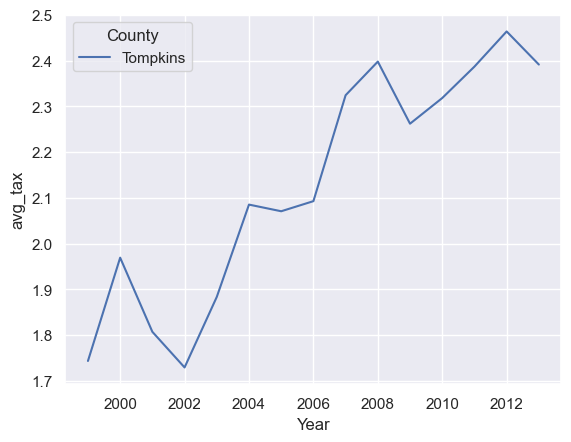

In [535]:
tax_a2 = tax[tax['IncomeClass'] == "Total"]
tax_a2 = tax_a2[tax_a2['County'] == "Tompkins"]
sns.lineplot(x="Year", y="avg_tax", hue="County", data=tax_a2)

What kind of plot did you choose to make? Why?

I used line plot because the data is over time.

In [536]:
tax_a2

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order,avg_tax
3531,1999,Tompkins,Total,NaN,34056.0,1420132.0,332529.0,17073.0,1070531.0,62169.0,59378.0,56,12,1.743540
11273,2000,Tompkins,Total,NaN,35038.0,1585530.0,346916.0,17193.0,1221414.0,72160.0,68998.0,56,12,1.969233
823,2001,Tompkins,Total,NaN,34758.0,1493756.0,344525.0,16956.0,1132274.0,66195.0,62816.0,56,12,1.807239
4107,2002,Tompkins,Total,NaN,34909.0,1476145.0,352804.0,16893.0,1106448.0,64478.0,60371.0,56,12,1.729382
1143,2003,Tompkins,Total,NaN,35168.0,1553294.0,361210.0,17110.0,1174966.0,71138.0,66239.0,56,12,1.883502
2886,2004,Tompkins,Total,NaN,35330.0,1695453.0,372694.0,17068.0,1305691.0,80625.0,73670.0,56,12,2.085197
5639,2005,Tompkins,Total,NaN,35570.0,1709389.0,383411.0,16967.0,1308922.0,80249.0,73653.0,56,12,2.070649
2412,2006,Tompkins,Total,NaN,35995.0,1818782.0,400061.0,16857.0,1401864.0,84378.0,75327.0,56,12,2.092707
5793,2007,Tompkins,Total,NaN,37304.0,2017698.0,419240.0,17038.0,1581421.0,96356.0,86700.0,56,14,2.324148
3628,2008,Tompkins,Total,NaN,38079.0,2087666.0,426667.0,17000.0,1664654.0,101842.0,91299.0,56,14,2.397621


## b)

Continuing to look only at Tompkins County, fit a model that predicts avg_tax using the year number. Do this with least squares.

In [537]:
from sklearn.linear_model import LinearRegression
x = tax_a2['Year'].to_numpy()
y = tax_a2['avg_tax'].to_numpy()
n = x.shape[0]

In [538]:
def plotdata(x=x,y=y, margin=.05):
    plt.scatter(x,y, label="data")
    plt.legend(loc="upper left")
    plt.xlabel("x") 
    plt.ylabel("y")     
    range_y = np.max(y) - np.min(y)
    range_x = np.max(x) - np.min(x)
    plt.ylim([np.min(y)-margin*range_y,np.max(y)+margin*range_y])
    plt.xlim([np.min(x)-margin*range_x,np.max(x)+margin*range_x])

# plot line y = w*x+b
def plotline(w,b, xmin=-100,xmax=100,nsamples=100,label=''):
    x = np.linspace(xmin, xmax, nsamples)
    y = w * x + b
    plt.plot(x, y, color='k', label=label)
    plt.legend(loc="upper left")
    plt.grid()

[0.00106121]


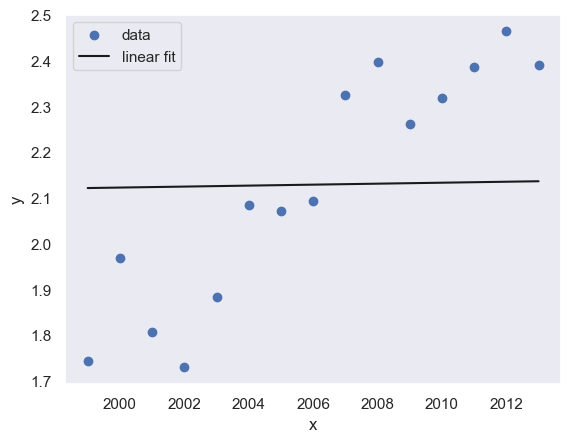

In [539]:
model = LinearRegression(fit_intercept=False).fit(x.reshape(-1, 1),y)
w = np.array(model.coef_)
print(w)
plotdata()
plotline(w[0], 0, xmin=1999,xmax=2013, label="linear fit")

Transform the input to include an offset term in the model

[   0.05272999 -103.64804934]


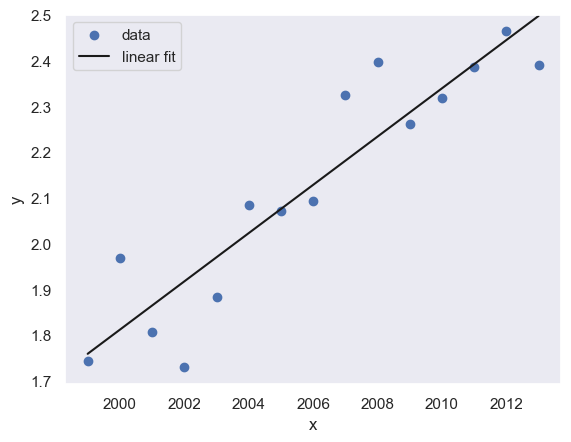

In [540]:
Xb = np.column_stack([x, np.ones(n)])
model = LinearRegression(fit_intercept=False).fit(Xb,y)
w = np.array(model.coef_)
print(w)
plotdata()
plotline(w[0], w[1], xmin=1999, xmax=2013, label="linear fit")

## c)

Now we will change the feature space. Fit a model using the year and the avg_tax from the previous year (and offset).

In [541]:
# prev_tax = np.zeros(y.shape[0])
# for i in range(1, prev_tax.shape[0]):
# 	prev_tax[i] = y[i-1]
prev_tax = y[:n-1]
print(prev_tax)

Xc = np.column_stack([x[1:], prev_tax, np.ones(n-1)])
print(Xc[:,:2])
model = LinearRegression(fit_intercept=False).fit(Xc,y[1:])
wc = np.array(model.coef_)
print(wc)

[1.74354005 1.9692334  1.80723862 1.72938211 1.88350205 2.08519672
 2.07064942 2.09270732 2.32414754 2.39762074 2.26194723 2.31801928
 2.38669236 2.46348934]
[[2000.            1.74354005]
 [2001.            1.9692334 ]
 [2002.            1.80723862]
 [2003.            1.72938211]
 [2004.            1.88350205]
 [2005.            2.08519672]
 [2006.            2.07064942]
 [2007.            2.09270732]
 [2008.            2.32414754]
 [2009.            2.39762074]
 [2010.            2.26194723]
 [2011.            2.31801928]
 [2012.            2.38669236]
 [2013.            2.46348934]]
[  0.04146927   0.19107589 -81.45539241]


Interpret the coefficients of this. What do they mean?

From the coefficient, we can see that the result depends more on the second feature of X. Also the bias term is a large negative, which means that there's a big offset.

Plot the real average tax return per year against your model's prediction. Discuss how you think your model fits.

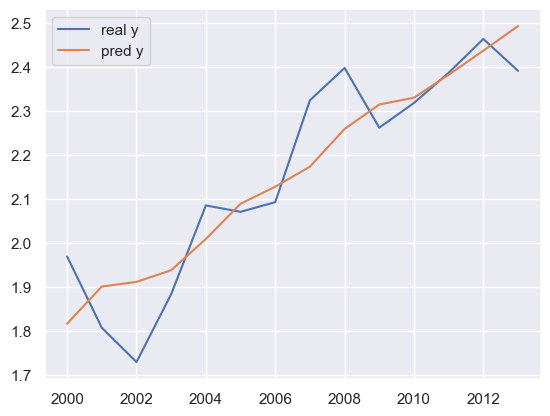

In [542]:
y_pred = np.zeros(n-1)
for i in range(n-1):
    y_pred[i] = np.dot(wc, Xc[i])
plt.plot(x[1:], y[1:], label = "real y")
plt.plot(x[1:], y_pred, label = "pred y")
plt.legend()
plt.show()

## d)

Add two new features to your model. This could be a column of the data, a transformation of a column, or a new column formed from another. The only requirement is that the prediction in year $t$ be based on data avilable by the end of year $t-1$

State the feature space for your new model and why you think those features predict the data well. Fit this model and interpret the coefficients.

The two new features I choose are TotalIncome and TotalDeductions. I think they will predict the data well since these two features have similar plots as the average tax return, so they could be correlated.

In [543]:
# feature: year, previous year avg_tax, TotalIncome and TotalDeductions
Xd = np.column_stack([x[1:], prev_tax, tax_a2['TotalIncome'].to_numpy()[:n-1], \
    tax_a2['TotalDeductions'].to_numpy()[:n-1], np.ones(n-1)])
model = LinearRegression(fit_intercept=False).fit(Xd,y[1:])
wd = np.array(model.coef_)
print(wd)

[  0.01071174  -0.01737063  -0.00000026   0.00000683 -21.4986262 ]


From the coefficient, we can see that the result depends more on the first and second feature of X and less on the other two. The bias term is small which indicates a smaller offset.

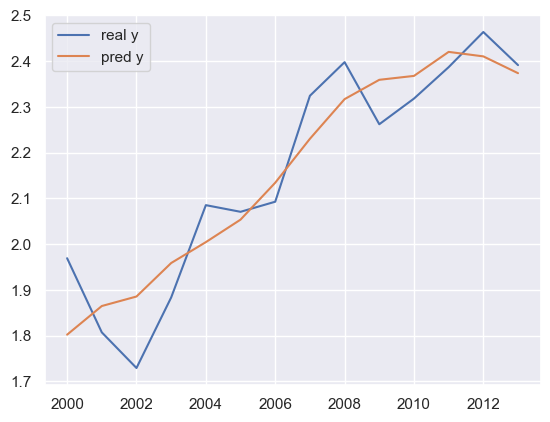

In [544]:
y_pred = np.zeros(n-1)
for i in range(n-1):
    y_pred[i] = np.dot(wd, Xd[i])
plt.plot(x[1:], y[1:], label = "real y")
plt.plot(x[1:], y_pred, label = "pred y")
plt.legend()
plt.show()

## e)

Compare the coefficients from part c and d. Does the coefficient of avg_tax differ in the two models? If so, how do you interpret this difference?

Yes they're different. This is because y is dependent on all four features and thus adding more features will change the original feature's weight.

## f)

(see homework handout) Now we want to see how this model performs in other counties. Apply the model you fit in part c, with coefficients $w^c$, to data from the other counties and compute the error of this model on each data set.

Plot a histogram of the mean errors the model makes.

In [545]:
def helperf(df):
    y_loc = df['avg_tax'].to_numpy() # 15
    prev_tax_loc = y_loc[:n-1] # 14
    X_loc = np.column_stack([x[1:], prev_tax_loc, np.ones(n-1)]) # 14, 3
    result = 0
    for i in range(n-1):
        result += (np.dot(wc, X_loc[i]) - y_loc[i+1]) ** 2
    return result / (n-1)

In [546]:
tax_total = tax[tax['IncomeClass'] == "Total"]
tax_total_valid = tax_total.loc[~((tax_total['County'] == 'Residence Unknown ++') \
    | (tax_total['County'] == 'NYS Unclassified +') | (tax_total['County'] == 'Grand Total, Full-Year Resident'))]
counties = tax_total_valid.County.unique()
grouped = tax_total_valid.groupby(tax_total_valid.County)
errorsf = []
for county in counties:
    if (len(grouped.get_group(county).Year) == 15):
        errorsf.append([county, helperf(grouped.get_group(county))])

<AxesSubplot: xlabel='Error', ylabel='Count'>

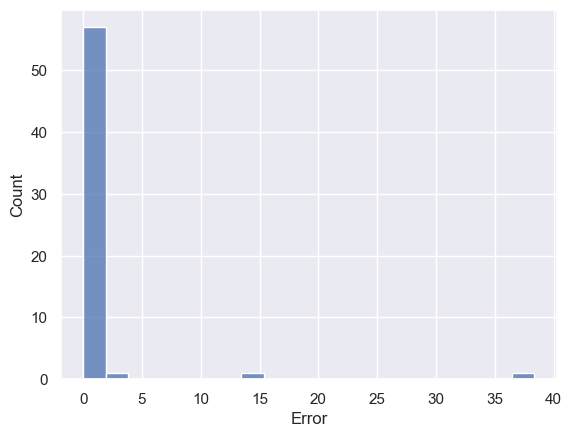

In [561]:
dff = pandas.DataFrame(errorsf, columns=['County', 'Error'])
# dff
sns.histplot(x="Error", data=dff, bins=20)

In [565]:
dff

,County,Error
0,Franklin,0.771967
1,Cayuga,0.494991
2,Oswego,0.498378
3,Essex,0.441615
4,Nassau,3.831168
5,Columbia,0.045504
6,Wayne,0.398447
7,Montgomery,0.731315
8,Steuben,0.324101
9,Putnam,1.043045


Compare to the error on data from Tompkins County, error on other counties are higher.

Are there major outliers?

Yes, most county has mean error less than 1.0, but Westchester: 14.439801 and New York City - Manhattan: 38.352041. These are two major outliers.

## g)

Using the same features you chose in part d, fit a model to the data for each of the other counties. These will be county-specific models. They may have different coefficient vectors from $w^d$.

Plot a histogram of the mean square errors of the county-specific models for their respective counties.

In [562]:
def helperg(df):
    y_loc = df['avg_tax'].to_numpy() # 15
    prev_tax_loc = y_loc[:n-1] # 14
    X_loc = np.column_stack([x[1:], prev_tax_loc, df['TotalIncome'].to_numpy()[:n-1], \
    df['TotalDeductions'].to_numpy()[:n-1], np.ones(n-1)]) # 14, 5
    model = LinearRegression(fit_intercept=False).fit(X_loc,y_loc[1:])
    w_loc = np.array(model.coef_)
    print(w_loc)
    result = 0
    for i in range(n-1):
        result += (np.dot(w_loc, X_loc[i]) - y_loc[i+1]) ** 2
    return result / (n-1)

In [563]:
errorsg = []
for county in counties:
    if (len(grouped.get_group(county).Year) == 15):
        errorsg.append([county, helperg(grouped.get_group(county))])

[  0.02216809  -0.23606012   0.00000115  -0.00000476 -43.00977876]
[  0.02912789   0.18486429   0.0000001   -0.00000168 -56.96467161]
[  0.00911026   0.07425179   0.0000003    0.00000045 -17.84762227]
[  0.02368465   0.34708105  -0.0000004    0.00000185 -46.69232714]
[ 0.00010997  1.2363817  -0.00000008  0.00000029  0.61242048]
[ 0.00238975  1.33573669 -0.00000116  0.00000236 -4.60284568]
[  0.01138852  -0.48450997   0.00000091  -0.00000439 -20.39448333]
[  0.01748403  -0.85624173   0.00000341  -0.00001386 -32.63119796]
[  0.02757145   0.07553222   0.00000032  -0.00000773 -51.25252526]
[   0.14216014   -2.2540843     0.00000197   -0.00000158 -279.72696286]
[ 0.0044423   1.23585284 -0.00000008  0.00000028 -8.83947766]
[  0.00577136   1.37856898  -0.0000007    0.00000215 -11.63176543]
[  0.041918     1.14380232  -0.00000104   0.00000285 -83.51823621]
[  0.01452248   0.47865014  -0.00000031   0.0000022  -28.7355874 ]
[  0.02819596   0.76001453  -0.00000141   0.00000421 -55.88151204]
[  0.

<AxesSubplot: xlabel='Error', ylabel='Count'>

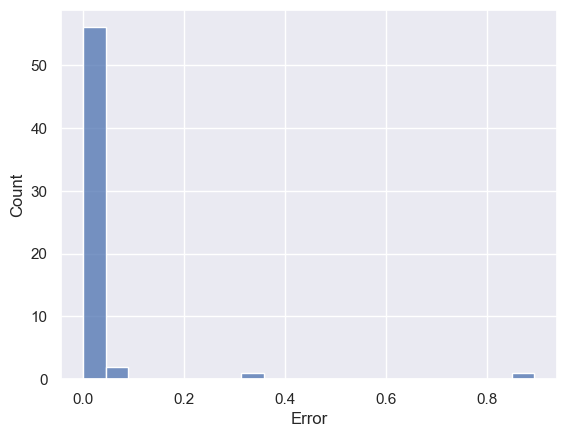

In [564]:
dfg = pandas.DataFrame(errorsg, columns=['County', 'Error'])
# dfg
sns.histplot(x="Error", data=dfg, bins=20)

Again, are there major outliers? How do the coefficients compare across counties?

All the mean errors are less than 1 and there's no major outliers here. The coefficients of different counties vary a lot.